In [13]:
import requests
import pandas as pd

end_date = pd.Timestamp.now()
settlementDate = (end_date - pd.Timedelta(hours=0.5)).date()
settlementPeriod = (end_date - pd.Timedelta(hours=0.5)).hour * 2

# options - 'PN', 'QPN', 'MILS', 'MELS
dataset = 'MILS'

web = 'https://data.elexon.co.uk/bmrs/api/v1/balancing/physical/all?dataset=' + dataset + '&settlementDate=' + str(settlementDate) + '&settlementPeriod=' + str(settlementPeriod) + '&format=json'

r = requests.get(web)
df = pd.DataFrame(r.json()['data'])
# df.index = df['nationalGridBmUnit']
df.set_index('nationalGridBmUnit', inplace=True)
df

,dataset,settlementDate,settlementPeriod,timeFrom,timeTo,levelFrom,levelTo,bmUnit
nationalGridBmUnit,,,,,,,,
AG-BFLX02,MILS,2024-02-02,24,2024-02-02T11:59:00Z,2024-02-02T12:00:00Z,-5,-5,2__BFLEX002
AG-COCT00,MILS,2024-02-02,24,2024-02-02T11:59:00Z,2024-02-02T12:00:00Z,0,0,2__CMRCY001
NFSE02,MILS,2024-02-02,24,2024-02-02T11:59:00Z,2024-02-02T12:00:00Z,-12,-12,2__NFSEN007
ARNKB-1,MILS,2024-02-02,24,2024-02-02T11:59:00Z,2024-02-02T12:00:00Z,-13,-10,E_ARNKB-1
AG-CBS06B,MILS,2024-02-02,24,2024-02-02T11:59:00Z,2024-02-02T12:00:00Z,-9,-8,V__BCEND004
...,...,...,...,...,...,...,...,...
AG-FLX02N,MILS,2024-02-02,24,2024-02-02T11:30:00Z,2024-02-02T12:00:00Z,0,0,V__NFLEX001
AG-FLX07N,MILS,2024-02-02,24,2024-02-02T11:30:00Z,2024-02-02T12:00:00Z,0,0,V__NFLEX002
AG-HEL0DN,MILS,2024-02-02,24,2024-02-02T11:30:00Z,2024-02-02T12:00:00Z,0,0,V__NHABI005


<Axes: title={'center': 'Maximum Import Level (MW)'}, xlabel='nationalGridBmUnit'>

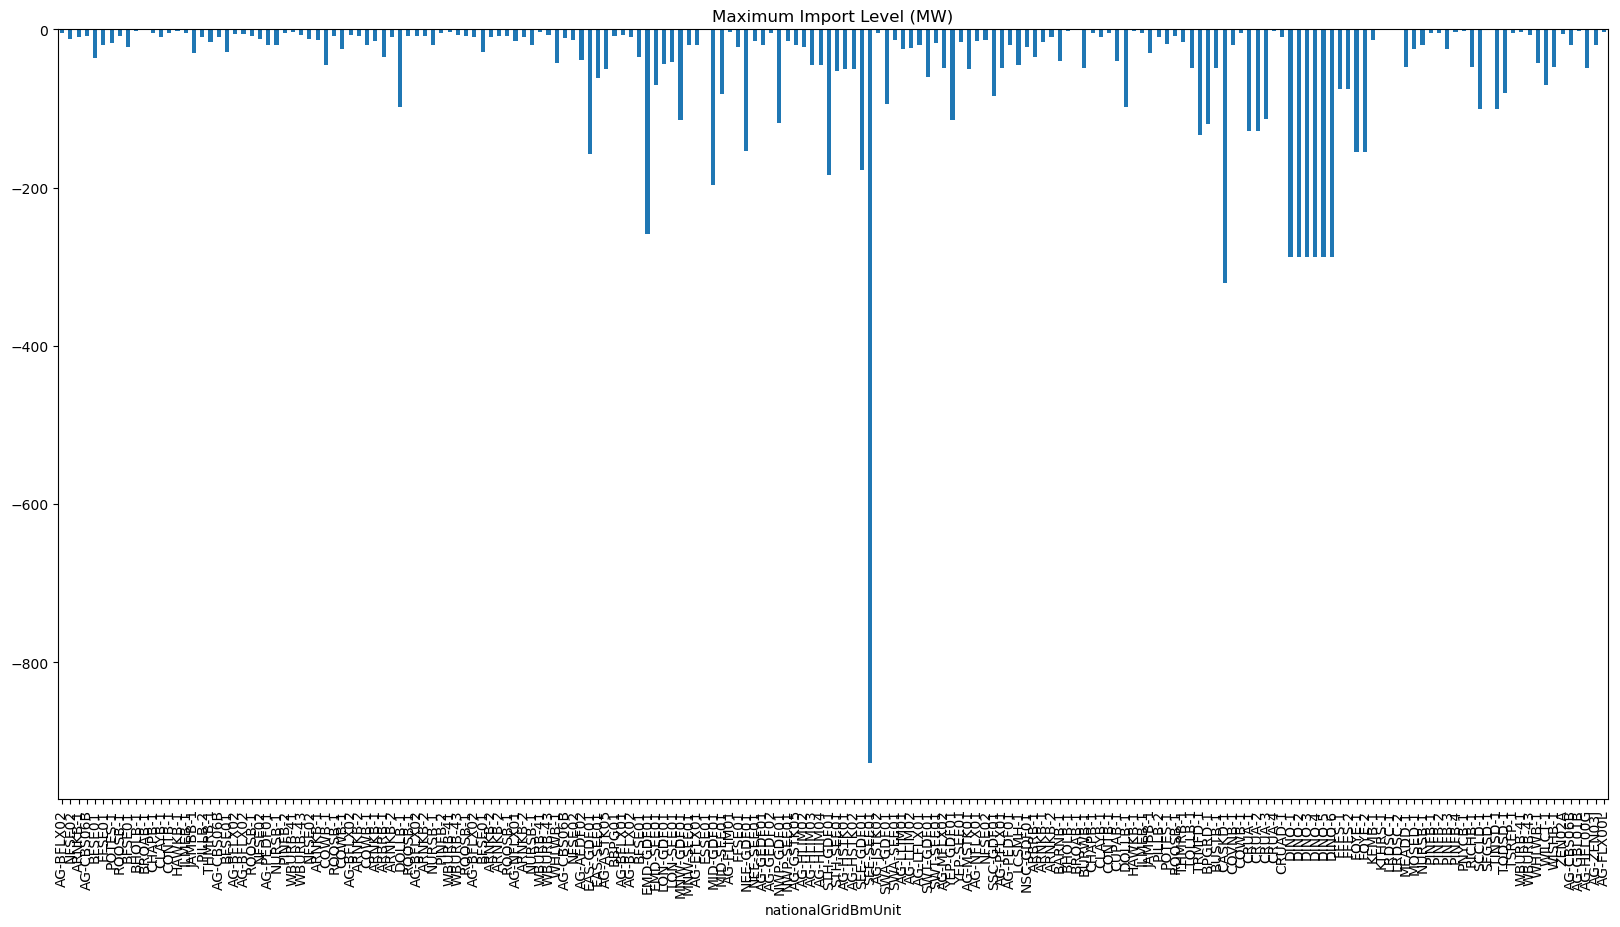

In [14]:
ds_plot = df['levelTo'].dropna().astype('float')
ds_plot[ds_plot != 0].plot(kind='bar', figsize=(20, 10), title='Maximum Import Level (MW)')

In [15]:
ds_plot.sum()

-9158.0